# REMARKS
- Everybody: Error barsssss in plots
- Everybody: Use Pearson coefficients to check for trends
- Everybody : PEARSON COEFFICIENT

- Ali: First t-test !!! (The purpose of the t-test is to compare certain characteristics representing groups, and the mean values become representative when the population has a normal distribution. This is the reason why satisfaction of the normality assumption is essential in the t-test.)

- Ali: Maybe for the first plot, plot CCDF, And find adequate TEST TO COMPARE (Kolmogorov-Smirnov test) to compare distributions

- Ali: no merging is needed for Famous actors + Choose first 180 to consider "well-recognized actors"

- Ali: plot gender of "well-recognized actors" through years

- André + Ali: Age of actors while famous

- Diego: parle de cumulative inflation dans les methodes peut etre
- André + Nicolas: How do we handle missing dates?(can we scrape them?)

- Diego: Explique que: "for now the constants we're using are just empirical constants, we will need to tune them after"

- Diego: Parle de Social media dataset (si onn trouve une qui existe) et voir si ca valide nos predictions


CHANGES NOT TO FORGET
- for fame Mean or sum?

actor_movie_year = actor_popularity_movie_coef.groupby(['Actor Name', 'Year'])['Recognition Coefficient'].mean().reset_index()

- Change 20 years to 5 years


- These were not needed

actor_movie_year['Year'] = actor_movie_year['Year'].replace(1010, 2010)
actor_movie_year = actor_movie_year[actor_movie_year['Year'] >= 1914]

pd.set_option('display.max_columns', None)



- OK André + Pico: Think about How to Normalize?

- OK André + Pico:Pico: See if there are other visualizations we could use

- OK André + Pico: Any pearson coefficient to show trends

- OK André + Pico: Plot revenue before normalization to show it's heavy tailed

- OK Pico: Look at last block (See if it's interesting)

actor_year_df.groupby('Year').mean().reset_index().plot(x='Year',y='Recognition Coefficient')
- OK André: lower case actors?

- OK André: How many famous actors per year?



## Loading data

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from datetime import datetime as dt
import seaborn as sns
from scipy import stats

In [452]:
character = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/MovieSummaries/character.metadata.tsv', sep='\t', header=None)
movie = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
plot_summaries = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/MovieSummaries/plot_summaries.txt', sep='\t', header=None)
IMDb_data = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/IMDB/akas.tsv', sep='\t', dtype={7: str})
IMDb_ratings = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/IMDB/ratings.tsv', sep='\t')
TheMoviesDataset = pd.read_csv('/Users/alielguindi/Desktop/Projects/TheMoviesDataset/movies_metadata.csv')
mojo_int1000 = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/archive/boxofficemojointernationaltop1000.tsv', sep='\t')
mojo_us1000 = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/archive/boxofficemojoustop1000.tsv', sep='\t')
inflation = pd.read_excel('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/Inflation-data.xlsx', sheet_name='hcpi_a')
imdb_actor_name = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/IMDB/name.basics (1).tsv', sep='\t')

/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/2378665993.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  TheMoviesDataset = pd.read_csv('/Users/alielguindi/Desktop/Projects/TheMoviesDataset/movies_metadata.csv')


In [453]:
# Adding column names
movie_columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]
character_columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]
plot_summaries_columns = ["Wikipedia movie ID", "Plot summary"]
movie.columns = movie_columns
character.columns = character_columns
plot_summaries.columns = plot_summaries_columns

# Preprocessing

## Prepare the inflation dataframe

In [454]:
# Considering inflation in the US as a baseline
inflation_us = inflation[inflation['Country Code']=='USA']

# Melt the DataFrame to reshape it
melted_inflation = pd.melt(inflation_us, id_vars=['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name'], var_name='Year', value_name='Inflation')

# Convert the "Year" column to numeric
melted_inflation['Year'] = pd.to_numeric(melted_inflation['Year'], errors='coerce')

# Select relevant columns
melted_inflation = melted_inflation[['Year','Inflation']]
melted_inflation = melted_inflation.iloc[:-2]

# Create a DataFrame with years from 1914 to 1969 and 'inflation' set to 0 (To account for missing inflation values)
additional_years = pd.DataFrame({'Year': range(1914, 1970), 'Inflation': 0})

# Add a year 0 for missing years
additional_years = additional_years.append({'Year':0,'Inflation':0}, ignore_index=True)


# Merge the additional_years DataFrame with melted_inflation (Adding 0 inflation to missing years)
melted_inflation = pd.concat([melted_inflation, additional_years], ignore_index=True, sort=False)

# Sort the DataFrame
melted_inflation = melted_inflation.sort_values(by='Year')

# Calculate cumulative inflation to adapt revenues further
melted_inflation['Cumulative Inflation'] = (melted_inflation['Inflation'].astype(float)/100 + 1).cumprod()

melted_inflation.head(2)

/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/2945748275.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_years = additional_years.append({'Year':0,'Inflation':0}, ignore_index=True)


,Year,Inflation,Cumulative Inflation
109,0.0,0,1.0
53,1914.0,0,1.0


## Merging the dataframes
DIEGO:

Several datasets are used in this notebook, we need to merge several dataframes. Namely ....

In [455]:
# Merge movies and actors based on the Movie ID
movie_actor = pd.merge(movie, character, how="left", on=["Wikipedia movie ID","Freebase movie ID"])

# Merge IMDb ratings with the corresponding Movie title
IMDb_combined = pd.merge(IMDb_data,IMDb_ratings,left_on='titleId',right_on='tconst')

# Getting lower cases movie title to merge on titles
movie_actor['title_lower'] = movie_actor['Movie name'].str.lower()
IMDb_combined['title_lower'] = IMDb_combined['title'].str.lower()

# Average different ratings for same Movie
IMDb_combined_mean = IMDb_combined[['title_lower','averageRating']].groupby(['title_lower']).mean()
IMDb_combined_mean.reset_index(inplace=True)

# Merge IMDb ratings with the movies and actors dataframe
movie_actor_IMDb = pd.merge(movie_actor,IMDb_combined_mean[['title_lower','averageRating']],on='title_lower')

### Enrich dataframe with other datasets


In [456]:
# Add missing Box office values and missing release dates from other datasets (Mojo & The Movies Datset)

# Define a list of datasets to merge
datasets = [
    (TheMoviesDataset, 'original_title', 'revenue','release_date'),
    (mojo_us1000, 'Movie', 'Lifetime Gross','Year'),
    (mojo_int1000, 'Title', 'Worldwide Lifetime Gross','Year')
]

# Show that number of Nan values decreases
print("Numer of missing Box office values",movie_actor_IMDb['Movie box office revenue'].isna().sum())
print("Numer of missing release dates values",movie_actor_IMDb['Movie box office revenue'].isna().sum())
print("")

# Iterate through the datasets and merge
for dataset, movie_column, revenue_column, date_column in datasets:
    # Remove rows that have revenue = 0
    dataset=dataset[dataset[revenue_column]!=0.0]

    # Getting lower cases movie title to merge on titles
    dataset = dataset.copy()
    dataset['title_lower'] = dataset[movie_column].str.lower()

    # Grouping same movie names of dataset
    dataset = dataset.groupby('title_lower').agg({f'{revenue_column}': 'mean', f'{date_column}': 'first'}).reset_index()

    # Add missing values
    movie_actor_IMDb = pd.merge(movie_actor_IMDb, dataset[['title_lower', revenue_column, date_column]], on='title_lower', how='left')
    movie_actor_IMDb['Movie box office revenue'] = movie_actor_IMDb['Movie box office revenue'].fillna(movie_actor_IMDb[revenue_column])
    movie_actor_IMDb['Movie release date_x'] = movie_actor_IMDb['Movie release date_x'].fillna(movie_actor_IMDb[date_column])
    movie_actor_IMDb.drop([revenue_column,date_column], axis=1,inplace=True)

    # Show that number of Nan values decreases
    print("Numer of missing Box office values",movie_actor_IMDb['Movie box office revenue'].isna().sum())
    print("Numer of missing release dates values",movie_actor_IMDb['Movie release date_x'].isna().sum())
    print("")

movie_actor_IMDb.drop_duplicates(subset=['Actor name', 'Movie name', 'Movie release date_x'], inplace=True)

Numer of missing Box office values 328393
Numer of missing release dates values 328393

Numer of missing Box office values 306729
Numer of missing release dates values 9967

Numer of missing Box office values 306493
Numer of missing release dates values 9957

Numer of missing Box office values 306320
Numer of missing release dates values 9948



### Handle missing values

As we can see there are still missing release dates and missing box office revenues, those values need to be handled. Instead of removing any row that has a NaN value, which would lead to a lot of information loss (since we could have other information about the movie). We replace the NaN values in Box office and release dates by zero.

In [457]:
# Convert Nans to 0
movie_actor_IMDb['Movie box office revenue'] = movie_actor_IMDb['Movie box office revenue'].fillna(0)
movie_actor_IMDb['Movie release date_x'] = movie_actor_IMDb['Movie release date_x'].fillna(0)

Moreover, there are some actor names missing. Since our analysis relies on actors, if the actor's name is missing, then the corresponding row wouldn't be useful. Therefore we remove rows that have missing actor names

In [458]:
movie_actor_IMDb['Actor name'].isna().sum()

13088

In [459]:
# Remove rows that have missing actor names
movie_actor_IMDb.dropna(subset='Actor name', inplace=True)

### Adapt Box office with inflation

Since the value of the US dollar changes with time, we need to adapt the box office values to a comparable scale. To do so, the idea is to divide the Movie box office revenue by the Cumulative Inflation. That's what is done below


In [460]:
# Transform Movie release date from string to date
movie_actor_IMDb["Movie release date_x"] = pd.to_datetime(
    movie_actor_IMDb["Movie release date_x"], errors="coerce", utc=True
)
# Extract year from Movie release date
movie_actor_IMDb["Year"] = pd.DatetimeIndex(movie_actor_IMDb["Movie release date_x"]).year

movie_actor_IMDb_inflation = pd.merge(movie_actor_IMDb,melted_inflation[['Year','Cumulative Inflation']])

# Calculate Adapted Movie Box Office Revenue  
movie_actor_IMDb_inflation['Adapted Movie box office revenue'] = movie_actor_IMDb_inflation['Movie box office revenue']/movie_actor_IMDb_inflation['Cumulative Inflation']

The dataframe we have now has a row for each unique movie and actor pair.

For each row, the important data we have is:
- The Adapted Movie box office revenue
- The rating of the movie
- The release date of the movie
- The age of the actor and his date of birth
- The ethnicity of the actor
- The gender of the actor

# Actor Recognition Coefficients
DIEGO: Parler un peu

In [461]:
# Conserve relevant columns
columns_to_conserve = ['Actor name', 'Movie name', 'Movie release date_x', 'averageRating',\
                       'Adapted Movie box office revenue','Actor date of birth','Actor gender',\
                        'Actor ethnicity (Freebase ID)','Actor age at movie release' ,'Year']

conserved_df = movie_actor_IMDb_inflation[columns_to_conserve].copy()

conserved_df.columns = ['Actor Name', 'Movie name', 'Date', 'Rating',\
                       'Revenue','Actor date of birth','Actor gender',\
                        'Actor ethnicity (Freebase ID)','Actor age at movie release' ,'Year']

conserved_df = conserved_df.sort_values(by='Year', ascending=False)

conserved_df.head(2)

,Actor Name,Movie name,Date,Rating,Revenue,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor age at movie release,Year
409775,Nicky Wu,The Lovers,2017-05-05 00:00:00+00:00,6.771186,32018.70657,1970-10-31,M,NaN,NaN,2017.0
409774,Elvis Tsui,The Lovers,2017-05-05 00:00:00+00:00,6.771186,32018.70657,1961-10-13,M,NaN,NaN,2017.0


### Remove actors who have less than 5 movies
As a first preprocessing step we remove actors that have less than 5 movies, in order to reduce the computation time, since we consider that they won't be very well-recognized actors

In [462]:
# Remove actors who have less than 5 movies
actor_movie_counts = conserved_df['Actor Name'].value_counts()
actors_with_5_or_more_movies = actor_movie_counts[actor_movie_counts >= 5].index
filtered_df = conserved_df[conserved_df['Actor Name'].isin(actors_with_5_or_more_movies)]

### Normalize rating and revenue

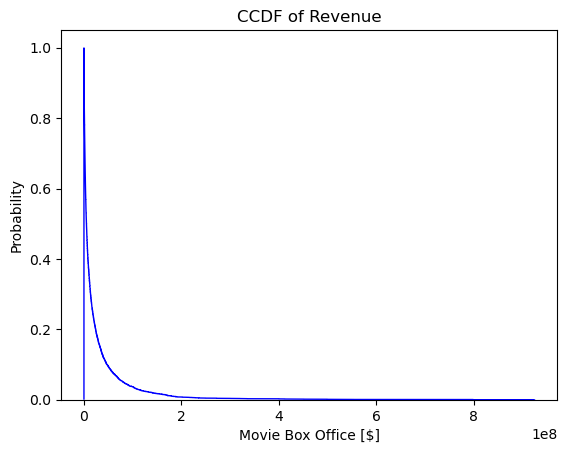

In [463]:
# Showing that revenue is heavy-tailed right skewed

# Remove zeros Revenues (missing revenues)
filtered_df_no_0s = filtered_df[filtered_df['Revenue'] > 1]

revenue_array = plt.hist(filtered_df_no_0s['Revenue'], bins=1000000, density=True, cumulative=-1,
                               color='blue', histtype='step', label="Revenue")
plt.xlabel('Movie Box Office [$]')
plt.ylabel('Probability')
plt.title('CCDF of Revenue')
plt.show()

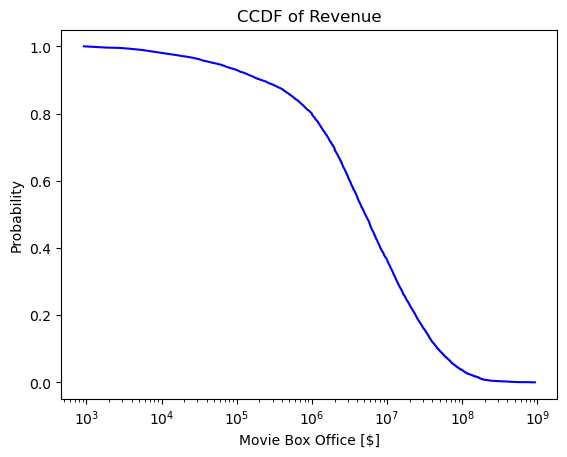

In [464]:
plt.plot(revenue_array[1][1:], revenue_array[0], label="Left-handed pitchers", color='blue')
plt.xscale('log')
plt.xlabel('Movie Box Office [$]')
plt.ylabel('Probability')
plt.title('CCDF of Revenue')
plt.show()

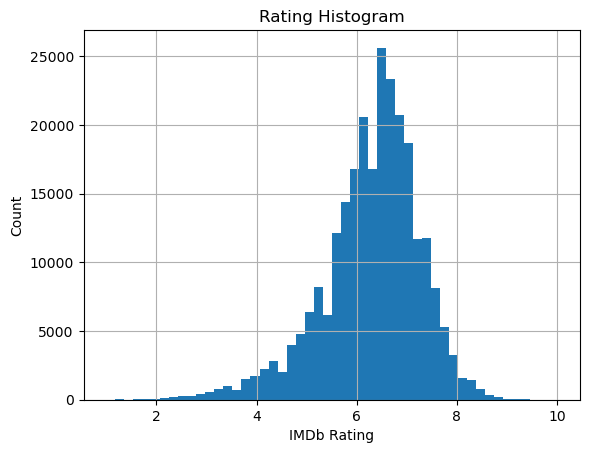

In [465]:
# Showing that rating is normal-like
filtered_df.hist(['Rating'],bins=50)
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.title('Rating Histogram')
plt.show()

As we can see from the previous plots:
- The Revenue of movies follows a right-skewed heavy-tailed distribution
- The Rating of movies follows a normal-like distribution

In order to normalize/scale these distributions, we use relevant techniques for each distribution:
- For a heavy-tailed distribution, we apply a logarithmic transformation
- For a normal distribution, we apply Z-score normalization

After these two normalizations, we then apply Min/Max scaling to have the same scale for the two distributions

In [466]:
# Assuming filtered_df is your DataFrame
columns_to_scale = ['Revenue', 'Rating']
actor_popularity_rank = filtered_df.copy()

# Z-score normalization for Rating then min max scaling
actor_popularity_rank['Rating'] = (actor_popularity_rank['Rating'] - actor_popularity_rank['Rating'].mean()) / actor_popularity_rank['Rating'].std()
actor_popularity_rank['Rating'] = (actor_popularity_rank['Rating']-actor_popularity_rank['Rating'].min())/(actor_popularity_rank['Rating'].max()-actor_popularity_rank['Rating'].min())


# log normalization of Revenue then min max scaling
actor_popularity_rank.loc[actor_popularity_rank['Revenue'] < 1, 'Revenue'] = 1
actor_popularity_rank['Revenue'] = actor_popularity_rank['Revenue'].apply(lambda x: np.log(x))
actor_popularity_rank['Revenue'] = (actor_popularity_rank['Revenue']-actor_popularity_rank['Revenue'].min())/(actor_popularity_rank['Revenue'].max()-actor_popularity_rank['Revenue'].min())

# Sort by 'Year' in descending order
actor_popularity_rank = actor_popularity_rank.sort_values(by='Year', ascending=False)

# Display the DataFrame
actor_popularity_rank.head(2)

,Actor Name,Movie name,Date,Rating,Revenue,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor age at movie release,Year
409774,Elvis Tsui,The Lovers,2017-05-05 00:00:00+00:00,0.641243,0.502492,1961-10-13,M,NaN,NaN,2017.0
409772,Charlie Yeung,The Lovers,2017-05-05 00:00:00+00:00,0.641243,0.502492,1974-05-23,F,NaN,NaN,2017.0


### Compute Actor Recognition Coefficient for each (Movie, Actor) pair
We define the Actor Recognition Coefficient to be a weighted average between the movie revenue and its rating.

DIEGO: WRITE FORMULA

In [467]:
# Compute Actor Recognition Coefficient for each (Movie, Actor) pair
columns_to_scale = ['Revenue', 'Rating']

#  Weights can be adjusted
weights = [1, 1]
actor_popularity_movie_coef = actor_popularity_rank

# Calculate weighted average of normalized rating and normalized revenue
actor_popularity_movie_coef['Recognition Coefficient'] = np.average(actor_popularity_rank[columns_to_scale], axis=1, weights=weights)

actor_popularity_movie_coef = actor_popularity_movie_coef.sort_values(by='Recognition Coefficient',ascending=False)

actor_popularity_movie_coef.head(2)

,Actor Name,Movie name,Date,Rating,Revenue,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor age at movie release,Year,Recognition Coefficient
59929,Robert De Niro,The Godfather Part II,1974-12-12 00:00:00+00:00,0.888889,0.909743,1943-08-17,M,/m/0xnvg,31.0,1974.0,0.899316
59926,Al Pacino,The Godfather Part II,1974-12-12 00:00:00+00:00,0.888889,0.909743,1940-04-25,M,/m/0xnvg,34.0,1974.0,0.899316


### Compute Actor Recognition Coefficient for every Actor every Year
This is done by taking the mean of the Recognition Coefficient of the movies the Actor played in each year

In [468]:
# Compute Actor Recognition Coefficient for every Actor every Year
actor_movie_year = actor_popularity_movie_coef.groupby(['Actor Name', 'Year'])\
    .agg({'Recognition Coefficient': 'mean', 'Date': 'first','Actor date of birth': 'first',\
          'Actor gender': 'first','Actor ethnicity (Freebase ID)': 'first'}).reset_index()
actor_movie_year = actor_movie_year.sort_values(by='Year',ascending=True)

actor_movie_year.head(2)

,Actor Name,Year,Recognition Coefficient,Date,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID)
44777,Elmo Lincoln,1914.0,0.319686,1914-04-25 00:00:00+00:00,1889-02-06,M,None
100880,Mae Hotely,1914.0,0.324074,1914-05-05 00:00:00+00:00,1872-10-07,F,None


### Expand the dataset to include entries for all actors in each year
We're creating a DataFrame with all actor-year combinations from 1914 to 2012, putting the Actor Recognition Coefficient to zero if the actor does not have films in the corresponding year

In [469]:
# Create a DataFrame with all actor-year combinations from 1914 to 2012
years = list(range(1914, 2013))

# Get unique actor names 
actors = actor_movie_year['Actor Name'].unique()

# Create a MultiIndex DataFrame with all possible actor-year combinations
actor_year_combinations = pd.MultiIndex.from_product([actors, years], names=['Actor Name', 'Year']).to_frame(index=False)
actor_year_combinations.columns = ['Actor Name', 'Year']

# Merge the actor_year_combinations DataFrame with actor_movie_year to get the coefficients
all_actor_year = pd.merge(actor_year_combinations, actor_movie_year, on=['Actor Name', 'Year'], how='left')

# Fill missing values in the 'Recognition Coefficient' column with 0
all_actor_year['Recognition Coefficient'].fillna(0, inplace=True)

# Rename 'Recognition Coefficient' to 'Actor Year Coefficient'
all_actor_year.rename(columns={'Recognition Coefficient': 'Recognition Coefficient'}, inplace=True)

# Sort the result DataFrame
all_actor_year = all_actor_year.sort_values(by=['Year', 'Actor Name'], ascending=[True, True])

# Reset the index
all_actor_year.reset_index(drop=True, inplace=True)

display(all_actor_year[['Actor Name', 'Year','Recognition Coefficient']])

,Actor Name,Year,Recognition Coefficient
0,50 Cent,1914,0.000000
1,A Martinez,1914,0.000000
2,A. E. Matthews,1914,0.000000
3,A. J. Bowen,1914,0.000000
4,A. J. Buckley,1914,0.000000
...,...,...,...
1788331,Şafak Sezer,2012,0.000000
1788332,Şener Şen,2012,0.000000
1788333,Žarko Potočnjak,2012,0.000000
1788334,Željko Ivanek,2012,0.710107


We now have a dataframe, that has a Recognition Coefficient value for each possible (Actor Name, Year) combination.
### Recognition of Past Years
Even if a certain actors does not play in any movie in a certain year, We consider that this actor would remain well-recognized to a certain extent during this year. To account for this effect, we add a certain fraction of the past year's Recognition Coefficient to the the current year's Recognition Coefficient


In [470]:
# Recognition of Past Years
previous_year_contribution = 0.5

actor_year_df = all_actor_year.copy()
actor_year_df.sort_values(by=['Actor Name', 'Year'], inplace=True)

# Initialize a dictionary to store the previous 'Coefficient with Past' values for each actor
prev_b_values = {}

# Iterate through the rows of the DataFrame to compute the values for column 'Coefficient with Past'
for index, row in actor_year_df.iterrows():
    actor = row['Actor Name']
    year = row['Year']
    a_value = row['Recognition Coefficient']
    
    if actor in prev_b_values:
        b_value = a_value + previous_year_contribution * prev_b_values[actor]
    else:
        b_value = a_value  # If there is no previous value, use A(actor, year) as-is
    
    actor_year_df.at[index, 'Coefficient with Past'] = b_value
    prev_b_values[actor] = b_value

actor_year_df['Year'] = pd.to_numeric(actor_year_df['Year'])

# Display the resulting DataFrame
display(actor_year_df[['Actor Name','Recognition Coefficient']])

,Actor Name,Recognition Coefficient
0,50 Cent,0.0
18064,50 Cent,0.0
36128,50 Cent,0.0
54192,50 Cent,0.0
72256,50 Cent,0.0
...,...,...
1716079,劉以達,0.0
1734143,劉以達,0.0
1752207,劉以達,0.0
1770271,劉以達,0.0


### General recognition
Now that we have the Actor Recognition Coefficient for every Actor in every Year, we can calculate the General Actor Recognition Coefficient by calculating the mean of the Recognition Coefficient through the years

In [471]:
general_recognition = actor_year_df.groupby(['Actor Name'])\
    .agg({'Recognition Coefficient': 'mean', 'Date': 'first','Actor date of birth': 'first',\
          'Actor gender': 'first','Actor ethnicity (Freebase ID)': 'first'}).reset_index()

general_recognition = general_recognition.sort_values(by='Recognition Coefficient',ascending=False)
(general_recognition).head(n=20)

,Actor Name,Recognition Coefficient,Date,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID)
11569,Michael Caine,0.261683,1950-01-01 00:00:00+00:00,1933-03-14,M,None
14400,Robert De Niro,0.254633,1965-01-01 00:00:00+00:00,1943-08-17,M,/m/0xnvg
3051,Clint Eastwood,0.249705,1955-12-14 00:00:00+00:00,1930-05-31,M,/m/09vc4s
11388,Max von Sydow,0.241228,1949-10-31 00:00:00+00:00,1929-04-10,M,/m/06mvq
6164,Harrison Ford,0.238554,1922-02-13 00:00:00+00:00,1884-03-16,M,/m/01qhm_
2899,Christopher Lee,0.237955,1947-01-01 00:00:00+00:00,1922-05-27,M,/m/0338zd
8395,John Wayne,0.235603,1926-01-01 00:00:00+00:00,1907-05-26,M,/m/063k3h
14409,Robert Duvall,0.231281,1956-01-01 00:00:00+00:00,1931-01-05,M,None
991,Anthony Hopkins,0.229380,1967-01-01 00:00:00+00:00,1937-12-31,M,/m/02g7sp
15313,Sean Connery,0.227576,1957-12-17 00:00:00+00:00,1930-08-25,M,/m/03lmx1


DIEGO: We can see that the most well-recognized actors are indeed actors that are well-known ....
Some of them are modern-day actors like Robert De Niro. However, we can also see that older well-recognized actors are accounted for as we find actors like John Wayne and Sean Connery

CONTINUE ...

### Actor Recognition Span Evolution Through time
In this section, the idea is to examine the span of the actors' Recognition through time. In other words, we are trying to find the year in which he started to be well-recognized and the year this recognition "ended". We do that by selecting the year range in which the Actor Recognition Coefficient is above a certain threshold.

DIEGO: CHECK AND COMPLETE
...

In [472]:
# Relative threshold for every actor, threshold being 30% of the Actor's Maximum Recognition

# Calculate fame threshold for each actor, threshold 50% of the maximum Recognition of this actor
fame_start_end_threshold = actor_year_df.groupby('Actor Name')['Recognition Coefficient'].max().reset_index()[['Actor Name','Recognition Coefficient']]
fame_start_end_threshold['threshold'] = 0.5*fame_start_end_threshold['Recognition Coefficient']
fame_start_end_threshold.drop(columns='Recognition Coefficient', inplace=True)


# Keep Recognition Values that are above the threshold
merged_df = pd.merge(actor_year_df, fame_start_end_threshold, on='Actor Name', how='left')
result_df = merged_df[merged_df['Recognition Coefficient'] > merged_df['threshold']]

# Find the minimum (first) and maximum (last) Year corresponding to these values
grouped = result_df.groupby('Actor Name').agg({'Year': ['min', 'max']})
grouped = grouped.reset_index()
grouped.columns = ['Actor Name', 'First Year', 'Last Year']  # Rename the columns
result_df = grouped.copy()  # Create a copy of grouped DataFrame

# Calculate the Range (last year - first year)
result_df['Range'] = result_df['Last Year'] - result_df['First Year']
result_df = result_df.sort_values(by='First Year')

result_df.head(1)

,Actor Name,First Year,Last Year,Range
4419,Edgar Kennedy,1914,1949,35


In [473]:
# Group ranges for each first year by taking the mean and standard deviation of the range
filtered_actor_year_df = result_df.sort_values(by='First Year')
grouped_years = filtered_actor_year_df.groupby('First Year')['Range'].agg(['mean', 'std']).reset_index()

grouped_years.head(1)

,First Year,mean,std
0,1914,23.927273,23.011152


# Results about Actor Recognition

### Visualizing Average Span of Recognition through the years

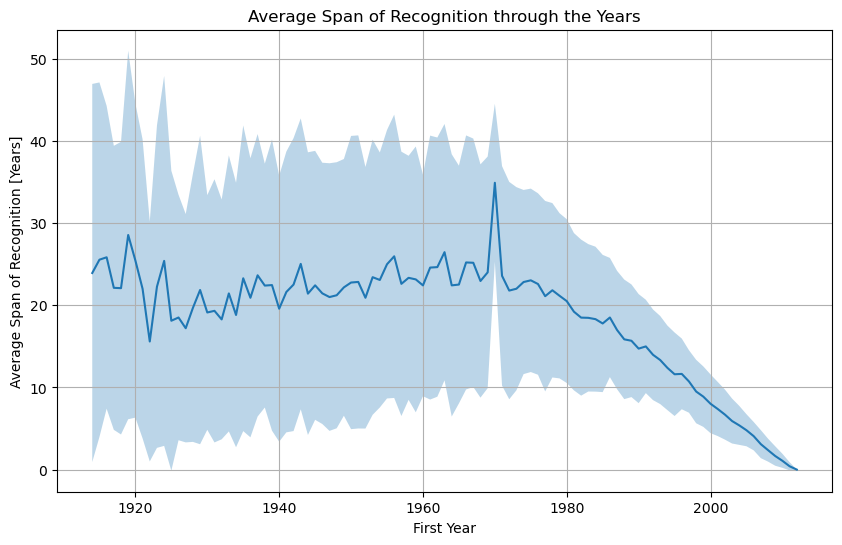

In [474]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_years['First Year'],grouped_years['mean'],label='Mean')
plt.fill_between(grouped_years['First Year'], grouped_years['mean'] - grouped_years['std'], grouped_years['mean'] + grouped_years['std'], alpha=0.3, label='Std Dev')
plt.title('Average Span of Recognition through the Years')
plt.xlabel('First Year')
plt.ylabel('Average Span of Recognition [Years]')
plt.grid(True)
plt.show()

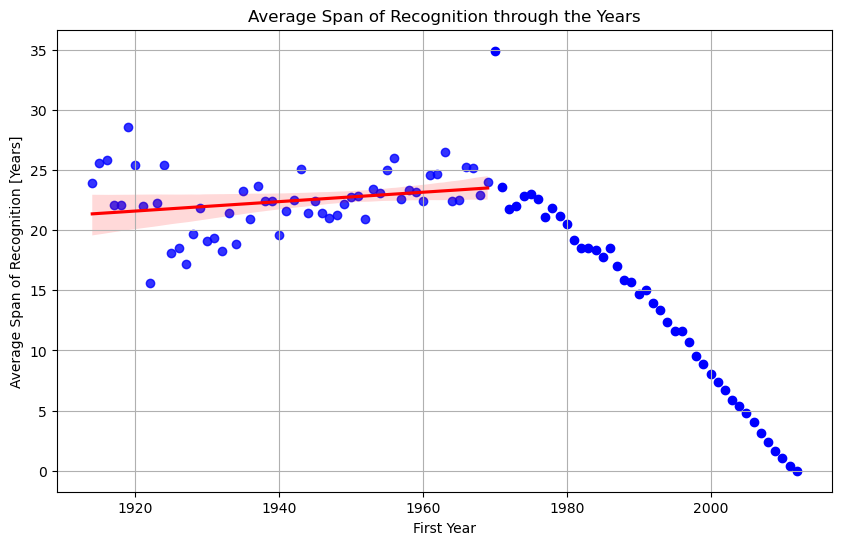

In [475]:
# Filter data before and after 1970
before_1970 = grouped_years[grouped_years['First Year'] < 1970]
after_1970 = grouped_years[grouped_years['First Year'] >= 1970]


# Plotting
plt.figure(figsize=(10, 6))

# Plotting regression line for before 1970
regplot_before_1970 = sns.regplot(x='First Year', y="mean", data=before_1970, ci=95, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, label='Before 1970')
# Plotting scatter points for after 1970
plt.scatter(after_1970['First Year'], after_1970['mean'], color="blue", marker="o", label='After 1970')


plt.title('Average Span of Recognition through the Years')
plt.xlabel('First Year')
plt.ylabel('Average Span of Recognition [Years]')
plt.grid(True)
plt.show()

DIEGO:!! (MET LE MOT LONGEVITY)

ANALYZE THIS GRAPH (SEE IF THERE ARE OTHER RELEVANT GRAPHS)

NOTE: starting about 1970 this range decrease since the data we have ends on 2012. Therefore actors starting to be recognized in 2012 (Having a First Year of 2012), would have a range of 0 years since their Last Year would also be considered to be 2012

DIEGO: CHECK AND COMPLETE

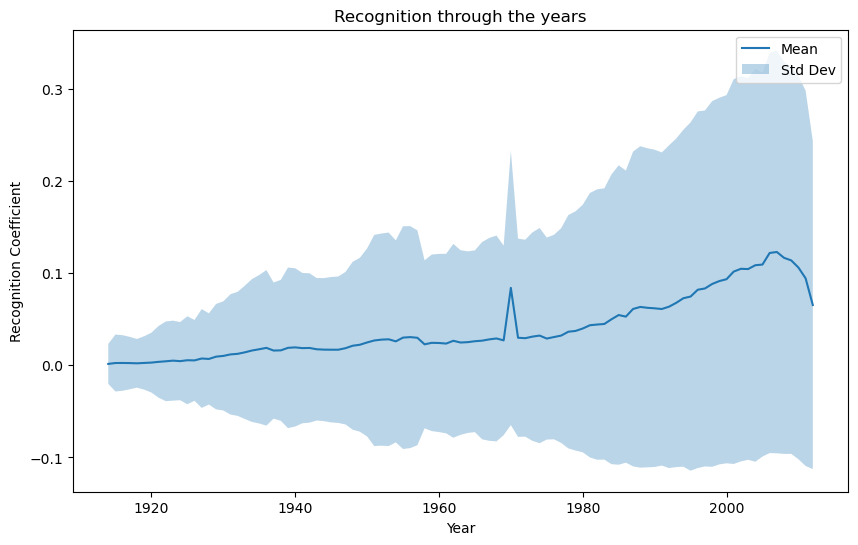

In [476]:
# Mean Value of Recognition coefficient through the Years
grouped_data = actor_year_df.groupby('Year')['Recognition Coefficient'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['mean'], label='Mean')
plt.fill_between(grouped_data['Year'], grouped_data['mean'] - grouped_data['std'], grouped_data['mean'] + grouped_data['std'], alpha=0.3, label='Std Dev')
plt.title('Recognition through the years')
plt.xlabel('Year')
plt.ylabel('Recognition Coefficient')
plt.legend()
plt.show()

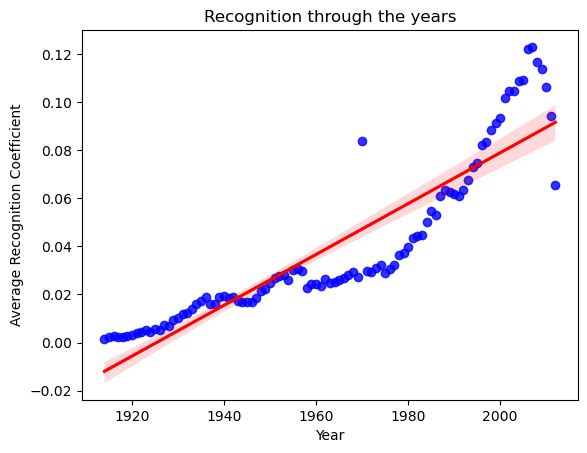

In [477]:
fig = sns.regplot(
    x='Year',
    y="mean",
    data=grouped_data,
    ci=95,
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title('Recognition through the years')
plt.xlabel('Year')
plt.ylabel('Average Recognition Coefficient')
plt.show()

In [478]:
# Calculate Pearson Coefficient for before 1970
print(stats.pearsonr(grouped_data['Year'],grouped_data['mean']))

PearsonRResult(statistic=0.9058978250299673, pvalue=5.673054462963483e-38)


DIEGO: CHECK & CONTINUE (SAY THAT WE SEE BIG STANDARD DEVIATION IN 1ST PLOT)

From the previous Pearson test, since we have an extremely small p-value, we have strong evidence to reject the null-Hypothesis that suggests that there is no correlation between the Year and the Average Recognition Coefficient.
This result should be further explored in P3, to find the reasons for this relation.

### Plot Recognition of a specific actors

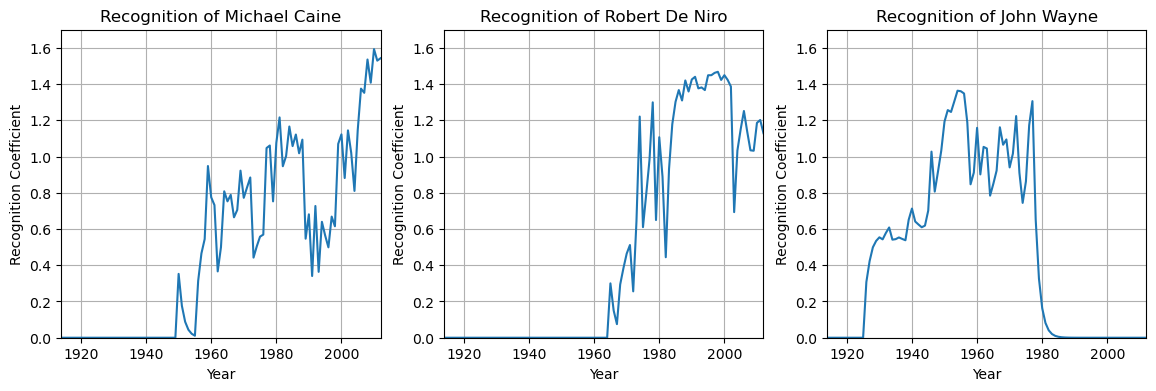

In [479]:
actor_names = ['Michael Caine','Robert De Niro','John Wayne']

fig, axes = plt.subplots(1, len(actor_names), figsize=(14, 4))


for i, actor_name in enumerate(actor_names):
    particular_actor_df = actor_year_df[actor_year_df['Actor Name'] == actor_name]
    years = particular_actor_df['Year']
    coefficients = particular_actor_df['Coefficient with Past']
    axes[i].plot(years, coefficients)
    axes[i].set_title(f'Recognition of {actor_name}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Recognition Coefficient')
    axes[i].grid(True)

    axes[i].set_xlim(1914, 2012)
    axes[i].set_ylim(0, 1.7)

plt.show()

### Number of well-recognized actors per year

/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/836937088.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  fame_start_end_threshold = actor_year_df.groupby('Actor Name').max().reset_index()[['Actor Name','Recognition Coefficient']]


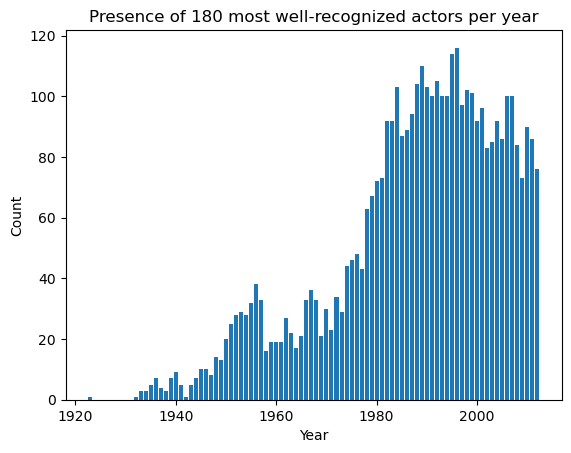

In [480]:
# Select the first 180 actors (int(len(general_recognition)/100)) in general_recognition and check in which years they are well-recognized

recognized_actors = general_recognition[:int(len(general_recognition)/100)]


# Calculate fame threshold for each actor, threshold 50% of the maximum Recognition of this actor
fame_start_end_threshold = actor_year_df.groupby('Actor Name').max().reset_index()[['Actor Name','Recognition Coefficient']]
fame_start_end_threshold['threshold'] = 0.5*fame_start_end_threshold['Recognition Coefficient']
fame_start_end_threshold.drop(columns='Recognition Coefficient', inplace=True)


# Keep Years that are above the threshold
actor_year_df2 = actor_year_df[actor_year_df['Actor Name'].isin(recognized_actors['Actor Name'])]
merged_df = pd.merge(actor_year_df2, fame_start_end_threshold, on='Actor Name', how='left')
result_df = merged_df[merged_df['Recognition Coefficient'] > merged_df['threshold']]

result_df2 = result_df.groupby('Year').count().reset_index()[['Year','Actor Name']]


plt.bar(result_df2['Year'],result_df2['Actor Name'])
plt.title('Presence of 180 most well-recognized actors per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

DIEGO: CHECK & CONTINUE

We see that the majority of the well-recognized actors are in years that follow 1980

# UNUSED BUT MIGHT BE USED

In [481]:
## REMOVED 6TH STEP BUT MIGHT BE USEFUL LATER
## 6TH STEP: REMOVE ACTORS WHO HAVE HAD SUCCESS BEFORE 1924 OR AFTER 2002
## THIS ALLOWS US TO REMOVE ACTORS WHO MIGHT STARTED ACTING BEFORE THE DATASET OR WHO CONTINUED ACTING AFTER
mask = actor_year_df[(actor_year_df['Year'] >= 2002) & (actor_year_df['Coefficient with Past'] > 0.1)]
actors_to_remove = mask['Actor Name'].unique()
filtered_actor_year_df = actor_year_df[~actor_year_df['Actor Name'].isin(actors_to_remove)]

mask = actor_year_df[(actor_year_df['Year'] <= 1924) & (actor_year_df['Coefficient with Past'] > 0.1)]
actors_to_remove = mask['Actor Name'].unique()
filtered_actor_year_df = filtered_actor_year_df[~actor_year_df['Actor Name'].isin(actors_to_remove)]
filtered_actor_year_df.reset_index(drop=True, inplace=True)

display(filtered_actor_year_df)

/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/2581459468.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_actor_year_df = filtered_actor_year_df[~actor_year_df['Actor Name'].isin(actors_to_remove)]


,Actor Name,Year,Recognition Coefficient,Date,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Coefficient with Past
0,A. E. Matthews,1914,0.0,NaT,NaN,NaN,NaN,0.000000e+00
1,A. E. Matthews,1915,0.0,NaT,NaN,NaN,NaN,0.000000e+00
2,A. E. Matthews,1916,0.0,NaT,NaN,NaN,NaN,0.000000e+00
3,A. E. Matthews,1917,0.0,NaT,NaN,NaN,NaN,0.000000e+00
4,A. E. Matthews,1918,0.0,NaT,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...
593599,Émile Genest,2008,0.0,NaT,NaN,NaN,NaN,3.462467e-09
593600,Émile Genest,2009,0.0,NaT,NaN,NaN,NaN,1.731233e-09
593601,Émile Genest,2010,0.0,NaT,NaN,NaN,NaN,8.656167e-10
593602,Émile Genest,2011,0.0,NaT,NaN,NaN,NaN,4.328084e-10


In [482]:
## CHECKING FOR CORRECTNESS WITH Željko Ivanek IN 2012
zelko_ivanek_df = actor_popularity_movie_coef[(actor_popularity_movie_coef['Actor Name'] == 'Željko Ivanek') & (actor_popularity_movie_coef['Year'] == 2012)]
display(zelko_ivanek_df)

,Actor Name,Movie name,Date,Rating,Revenue,Actor date of birth,Actor gender,Actor ethnicity (Freebase ID),Actor age at movie release,Year,Recognition Coefficient
383668,Željko Ivanek,Argo,2012-08-31 00:00:00+00:00,0.722716,0.784141,1957-08-15,M,/m/04_tz7,55.0,2012.0,0.753429
381697,Željko Ivanek,Seven Psychopaths,2012-09-07 00:00:00+00:00,0.677778,0.701844,1957-08-15,M,/m/04_tz7,55.0,2012.0,0.689811
382125,Željko Ivanek,The Words,2012-01-27 00:00:00+00:00,0.675556,0.698605,1957-08-15,M,/m/04_tz7,54.0,2012.0,0.687080


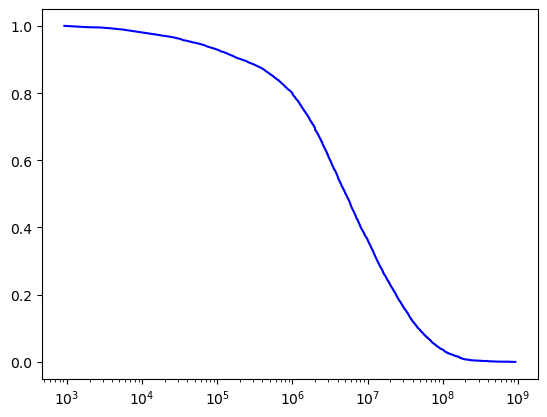

In [483]:
plt.plot(revenue_array[1][1:], revenue_array[0], label="Left-handed pitchers", color='blue')
plt.xscale('log')
plt.show()


In [484]:
# # ## 1ST STEP: RANKIZE RATING AND REVENUE
# columns_to_scale = ['Revenue', 'Rating']
# actor_popularity_rank = filtered_df.copy()
# ranks = filtered_df[columns_to_scale].rank()
# # normalized_ranks to be between 0 and 1
# normalized_ranks = (ranks - ranks.min()) / (ranks.max() - ranks.min())
# actor_popularity_rank[columns_to_scale] = normalized_ranks
# actor_popularity_rank = actor_popularity_rank.sort_values(by='Year', ascending=False)

# # display(actor_popularity_rank)

In [485]:
## Empirical threshold

# fame_start_end_threshold = 0.1

# Keep Recognition Values that are above the threshold
# filtered_actor_year_df = actor_year_df[actor_year_df['Coefficient with Past'] > fame_start_end_threshold]
# grouped = filtered_actor_year_df.groupby('Actor Name').agg({'Year': ['min', 'max']})
# grouped = grouped.reset_index()
# grouped.columns = ['Actor Name', 'First Year', 'Last Year']  # Rename the columns
# result_df = grouped.copy()  # Create a copy of grouped DataFrame

# Find the minimum (first) and maximum (last) Year corresponding to these values
# Calculate the Range (last year - first year)
# result_df['Range'] = result_df['Last Year'] - result_df['First Year']
# result_df = result_df.sort_values(by='First Year')

# display(result_df)


### Ali -

### Further analyis using the fame coeffecient and the other actors 

## Loading data

In [568]:
# Minor changes to the characters dataset
# Reading the characters metadata for subsequent analysis with the general fame
characters = pd.read_csv('/Users/alielguindi/Desktop/Projects/ada-2023-project-pandateam23/MovieSummaries/character.metadata.tsv', sep = '\t', names=["wikipedia_movie_id", "freebase_movie_id", "movie_dor", "character_name", "actor_dob",
                                "actor_gender", "actor_height", "actor_ethnicity", "actor_name",
                                "actor_age_release", "freebase_character_map", "freebase_character_id", "freebase_actor_id"],
                         header=None)

## Preprocessing

In [569]:
# Merging both dataframes to get the general fame of the actors with the charcaters metadata
#Merging on actor_name with an inner join to get only actors that are present in both dataframes
#Rename the column for the merging 
general_recognition.rename(columns = {'Actor Name' : 'actor_name'}, inplace = True)
characters_recognition = pd.merge(characters, general_recognition, on = 'actor_name', how = 'inner')


In [570]:
# Transform Movie release date from string to date
characters_recognition['movie_dor'] = pd.to_datetime(
    characters_recognition['movie_dor'], errors="coerce", utc=True
)
# Extract year from Movie release date and create a column for it
characters_recognition['movie_year'] = pd.DatetimeIndex(characters_recognition['movie_dor']).year





In [571]:
#Sanity check to see if Fame coeffecient does not contain any NaN values 
print('Number of NaN values in the Fame coeffecient column is : {}'.format(characters_recognition['Recognition Coefficient'].isna().sum()))

Number of NaN values in the Fame coeffecient column is : 0


In [572]:
# Now we have duplicates for the actors, we need to remove them. For this part we will keep the first occurence of the actor
characters_recognition_unique = characters_recognition.drop_duplicates(subset = 'actor_name', keep = 'first')

### The characters_recognition_unique  dataframe is the one for wich we will do our anylsis

### Now focusing on the yearly proportion of each sex in the industry

In [573]:
# Grouping by the sex to see the yearly proportion of each of them. 
characters_female = characters_recognition_unique.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'F']))
characters_male = characters_recognition_unique.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'M']))
characters_female_perc = (characters_female / (characters_female + characters_male)) * 100.0
characters_male_perc = (characters_male / (characters_female + characters_male)) * 100.0

In [574]:
#Descriptive statistics for women proportion wrt to men
characters_female_perc.describe()

count    106.000000
mean      34.179153
std       10.778125
min        0.000000
25%       30.837927
50%       33.710074
75%       37.764449
max      100.000000
dtype: float64

In [575]:
#Descriptive statistics for women proportion wrt to men
characters_male_perc.describe()


count    106.000000
mean      65.820847
std       10.778125
min        0.000000
25%       62.235551
50%       66.289926
75%       69.162073
max      100.000000
dtype: float64

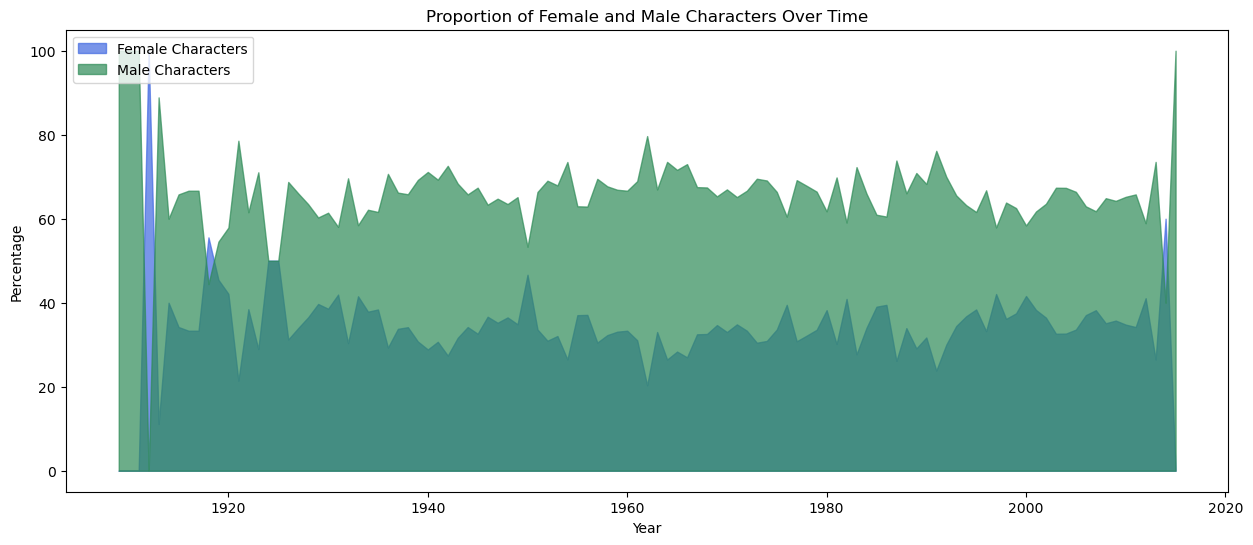

In [576]:
# Visualizing the proportions on the stacked area chart
# Prepare data for plotting
years = characters_male_perc.index
female_perc = characters_female_perc.values
male_perc = characters_male_perc.values

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the stacked area chart with more contrasting colors and transparency
ax.fill_between(years, female_perc, label='Female Characters', color='royalblue', alpha=0.7)
ax.fill_between(years, male_perc, label='Male Characters', color='seagreen', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Female and Male Characters Over Time')

# Add a legend to the plot
ax.legend(loc='upper left')

# Display the plot
plt.show()

In [577]:
# We do the same the thing but for the well-recoginzed actors
#Let us sort the dataframe by the Recognition Coefficient from the highest to the lowest
characters_recognition_unique = characters_recognition_unique.sort_values(by = 'Recognition Coefficient', ascending = False)

#Let us take the 10% most well-recognized actors
top_10_perc = int(len(characters_recognition_unique)*0.1)
characters_recognition_unique_top = characters_recognition_unique[:top_10_perc]

# Compute the yearly proportion of male and female as before for the top 1000 actors/actresses
characters_female_top = characters_recognition_unique_top.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'F']))
characters_male_top = characters_recognition_unique_top.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'M']))
characters_female_perc_top = (characters_female_top / (characters_female_top + characters_male_top)) * 100.0
characters_male_perc_top = (characters_male_top / (characters_female_top + characters_male_top)) * 100.0


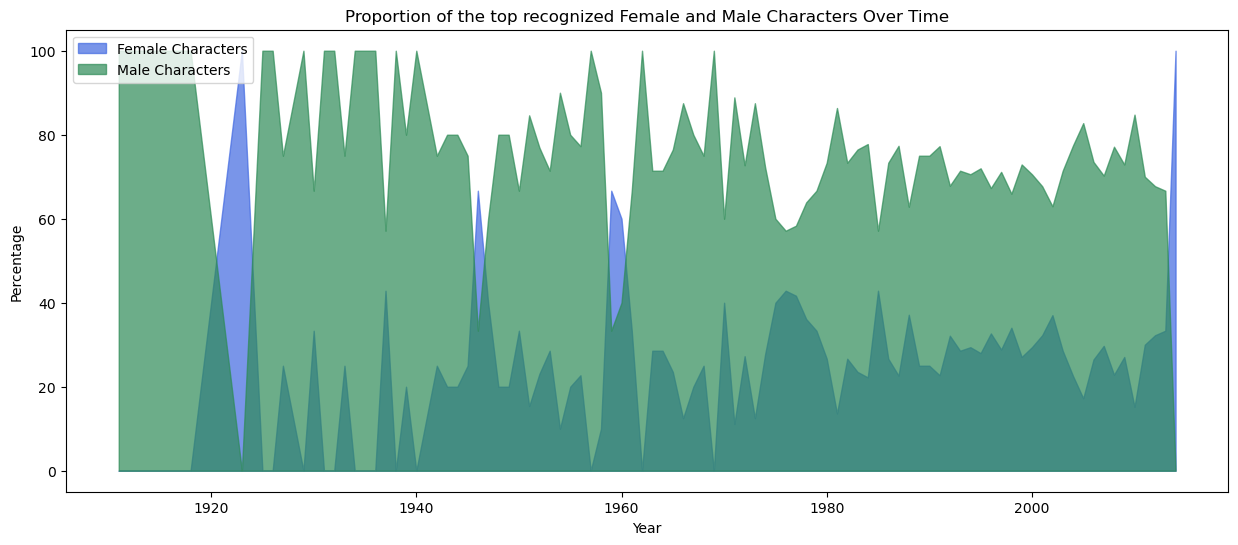

In [578]:
# Visualizing the proportions on the stacked area chart
# Prepare data for plotting
years = characters_male_perc_top.index
female_perc_top = characters_female_perc_top.values
male_perc_top = characters_male_perc_top.values

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the stacked area chart with more contrasting colors and transparency
ax.fill_between(years, female_perc_top, label='Female Characters', color='royalblue', alpha=0.7)
ax.fill_between(years, male_perc_top, label='Male Characters', color='seagreen', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of the top recognized Female and Male Characters Over Time')

# Add a legend to the plot
ax.legend(loc='upper left')

# Display the plot
plt.show()

***

### Analysis :  the recognition for each of the sex

In [579]:
#Getting recogniton coeffecient for male and female 
recognition_male = characters_recognition_unique.loc[characters_recognition['actor_gender'] == 'M']['Recognition Coefficient']
recognition_female = characters_recognition_unique.loc[characters_recognition['actor_gender'] == 'F']['Recognition Coefficient']

In [580]:
#Descriptive statistic for male fame coeffecient 
recognition_male.describe()

count    11667.000000
mean         0.041706
std          0.032267
min          0.002000
25%          0.020570
50%          0.030856
75%          0.051394
max          0.261683
Name: Recognition Coefficient, dtype: float64

In [581]:
#Descriptive statistic for female fame coeffecient 
recognition_female.describe()

count    6219.000000
mean        0.036797
std         0.027065
min         0.002778
25%         0.019149
50%         0.028022
75%         0.044975
max         0.216122
Name: Recognition Coefficient, dtype: float64

Text(0, 0.5, 'Count')

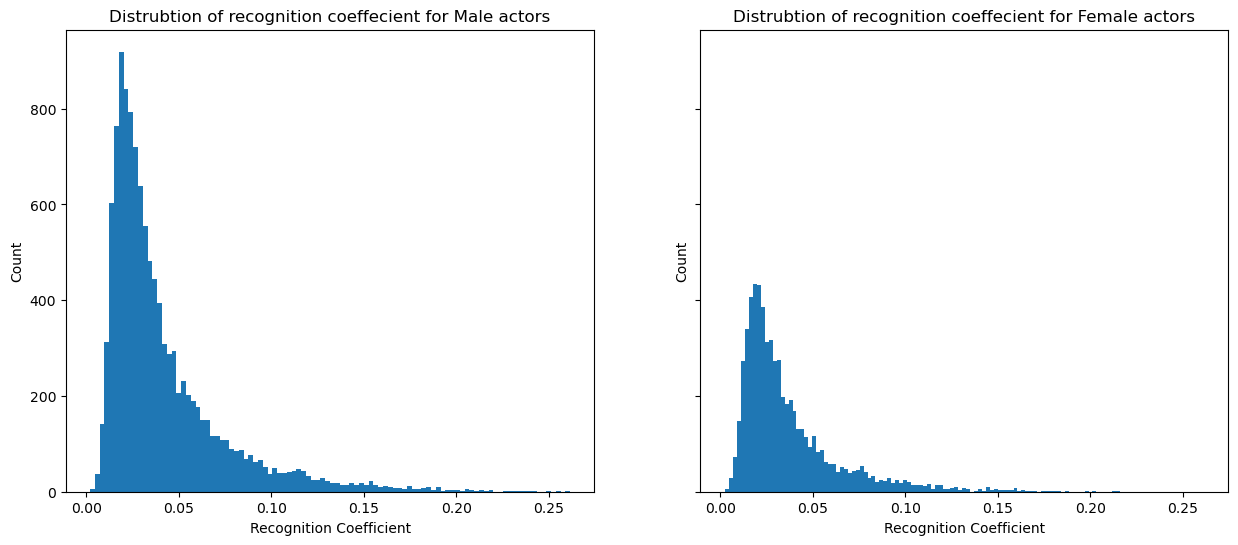

In [582]:
#Histogram to get a sense of the distribution of recognition for both men and women
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True,sharex = True)
# Plot the cleaned data with Seaborn
axs[0].hist(recognition_male, bins= 100)
axs[0].set_title('Distrubtion of recognition coeffecient for Male actors')
axs[0].set_xlabel('Recognition Coefficient')
axs[0].set_ylabel('Count')

axs[1].hist(recognition_female, bins= 100)
axs[1].set_title('Distrubtion of recognition coeffecient for Female actors')
axs[1].set_xlabel('Recognition Coefficient')
axs[1].set_ylabel('Count')

Notes about the histograms : 
* Both male and female actors generally have lower recognition coefficients, but males show a wider range of values.
* The distributions are right-skewed, indicating more actors are at the lower recognition end, with few exceptionally high values.
* Male actors have a longer tail in their distribution, suggesting a higher occurrence of very famous actors compared to females.
* The presence of outliers, especially among male actors, suggests some have much higher fame coefficients than other male actors.
* These observed patterns could affect statistical assumptions, like normality, in regression models.
* We could see that it is not a normal distribution but we will check by plotting their respective CCDF

Text(0, 0.5, 'Probability')

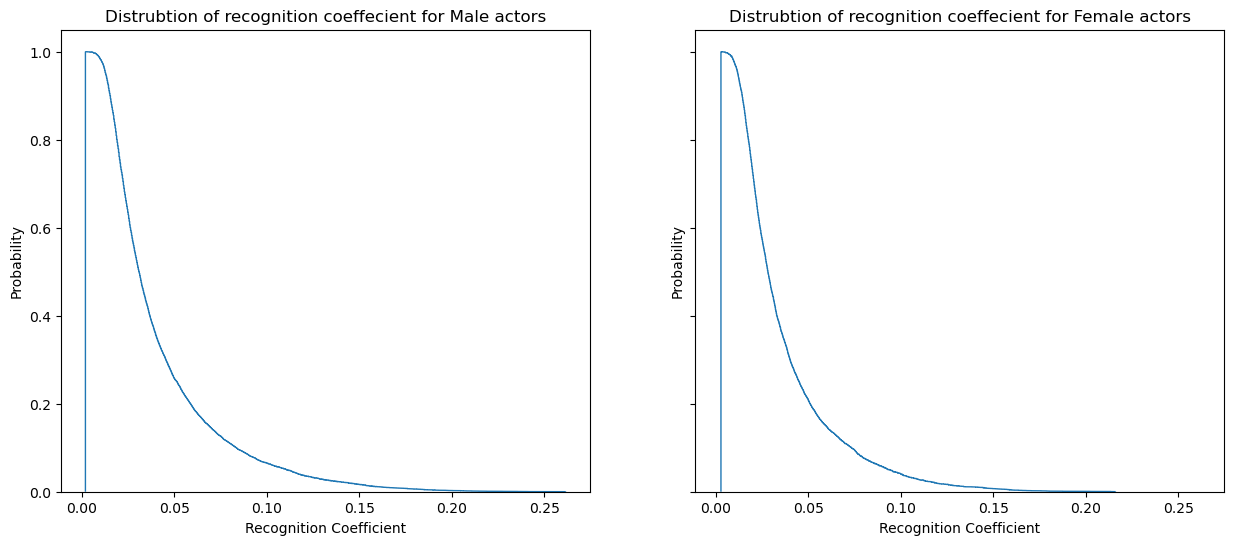

In [583]:
# Plotting the CCDF for both male and female : 

fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True,sharex = True)
# Plot the cleaned data with Seaborn
axs[0].hist(recognition_male,bins=1000, density=True, cumulative=-1, histtype='step')
axs[0].set_title('Distrubtion of recognition coeffecient for Male actors')
axs[0].set_xlabel('Recognition Coefficient')
axs[0].set_ylabel('Probability')

axs[1].hist(recognition_female,bins=1000, density=True, cumulative=-1, histtype='step')
axs[1].set_title('Distrubtion of recognition coeffecient for Female actors')
axs[1].set_xlabel('Recognition Coefficient')
axs[1].set_ylabel('Probability')




* This steep decline suggests that the recognition coefficients are not normally distributed, as a normal distribution would show a more gradual slope 
in the CCDF (which confirms our findings before)
* Heavy concentration of low values and a rapid drop-off, which is characteristic of a right-skewed distribution
* A t test is not adequate here

In [584]:
# t-test is not appropriate here because the distributions are not normal
# We will use the Kolmogorov-Smirnov test to check if the two distributions are the same or not
ks_statistic, p_value = stats.ks_2samp(recognition_female, recognition_male)

print('The p-value is : {}'.format(p_value))

The p-value is : 5.917426619372929e-14


* H0 : The two distributions are the same
* $\alpha = 0.05$
* We reject the null namely that both distributions are the same. This would mean that the distributions of recognition coefficients for male and female actors are statistically different. However, as seen in the lectures,  rejecting the null hypothesis doesn't necessarily prove the alternative hypothesis.

Now we will perform a simple linear Regression : with the fame coefficient as the dependent variable and gender (categorical) as the independent variable. For just the sake of  quantifying the change in the fame coefficient associated with being male versus female.

In [585]:
import statsmodels.formula.api as smf


#Renaming the column Fame Coefficient to fame_coefficient just for the  regression
characters_recognition_unique.rename(columns = {'Recognition Coefficient' : 'recognition_coefficient'}, inplace = True)

# Correcting the formula with backticks for the column name with space
mod = smf.ols(formula='recognition_coefficient ~ C(actor_gender)', data=characters_recognition_unique)

# Fit the model
results = mod.fit()

# View the results
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     recognition_coefficient   R-squared:                       0.006
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     104.7
Date:                     Thu, 16 Nov 2023   Prob (F-statistic):           1.67e-24
Time:                             00:21:56   Log-Likelihood:                 37010.
No. Observations:                    17886   AIC:                        -7.402e+04
Df Residuals:                        17884   BIC:                        -7.400e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

* Some notes about the model :
* Very simple Model
* Both coeffecients are statistically significant
* Intercept : The average recognitoon rating for female actors is about 0.0368, and this finding is statistically significant.
* Coeffecient for male actors : Male actors tend to have a recogniton score that is about 0.0049 points higher than female actors, and this difference is statistically significant.
* R-squared: 0.006, meaning that approximately 0.6% of the variance in fame_coefficient is explained by the model. This is a relatively low value
* Consistency with the histograms plotted before.

***

### Actor first appearence and recognition coeffecient 

In [586]:
# Let us compute the number of NaN values in the 'actor_age_release' which corresponds to the age of the actor at the time of the movie release
print('Number of NaN values in the actor_age_release column is : {}'.format(characters_recognition['actor_age_release'].isna().sum()))

Number of NaN values in the actor_age_release column is : 54011


In [587]:
# We have a dataset taken from IDMB which contains the birthYear of the actors
# In our dataset we have the movie release year, we can compute the age of the actor at the time of the movie release
# Start by merging the two datasets on the actor_name
# First we change the column name in IMDB dataset to match the one in the characters dataset
imdb_actor_name.rename(columns = {'primaryName' : 'actor_name'}, inplace = True)
# We remove the rows with missing birthYear and deathYear
imdb_actor_name = imdb_actor_name[imdb_actor_name['birthYear'] != '\\N']
imdb_actor_name = imdb_actor_name[imdb_actor_name['deathYear'] != '\\N']

In [588]:
# We have some false values in the birthYear column, we need to remove them to ensure the correctness of the age
# We take years bewteen 1910 and 2013
imdb_actor_name = imdb_actor_name[(imdb_actor_name['birthYear'] > '1910') & (imdb_actor_name['birthYear'] < '2013')]



In [589]:
# Merging the two datasets on actor_name
characters_recognition_unique_merged = pd.merge(characters_recognition, imdb_actor_name, on = 'actor_name', how = 'inner')

In [590]:
# Convert 'deathYear' and 'birthYear' to numeric for proper calculations.
characters_recognition_unique_merged['death_year'] = pd.to_numeric(characters_recognition_unique_merged['deathYear'], errors='coerce')
characters_recognition_unique_merged['birthYear'] = pd.to_numeric(characters_recognition_unique_merged['birthYear'], errors='coerce')

# Computing the age of the actor at the time of the movie release
characters_recognition_unique_merged['age_at_release'] = characters_recognition_unique_merged['movie_year'] - characters_recognition_unique_merged['birthYear']

# Some actors have movie years after their death year which is not possible, we need to remove these rows
# Retaining rows where movie_year is less than or equal to death_year or where death_year is NaN
characters_recognition_unique_merged = characters_recognition_unique_merged[
    (characters_recognition_unique_merged['movie_year'] <= characters_recognition_unique_merged['death_year']) |
    (characters_recognition_unique_merged['death_year'].isna())
]

# Remove the rows with age_at_release that are negative or zero
characters_recognition_unique_merged = characters_recognition_unique_merged[
    characters_recognition_unique_merged['age_at_release'] > 0
]

# Now we check for NaN values in the 'age_at_release' column
print('Number of NaN values in the age_at_release column is : {}'.format(
    characters_recognition_unique_merged['age_at_release'].isna().sum())
)

print('We have managed to eliminate {} NaN values'.format(
     characters_recognition_unique_merged['actor_age_release'].isna().sum() - characters_recognition_unique_merged['age_at_release'].isna().sum())
)




Number of NaN values in the age_at_release column is : 0
We have managed to eliminate 6120 NaN values


In [636]:
#Two dataframes : one for male and female
male_df = characters_recognition_unique_merged[characters_recognition_unique_merged['Actor gender'] == 'M']
female_df = characters_recognition_unique_merged[characters_recognition_unique_merged['Actor gender'] == 'F']


#Group by actor_name and get the minimum age at release to get the age at release for the first movie for both

male_min= male_df.groupby(['actor_name']).min().reset_index()[['actor_name','age_at_release', 'Recognition Coefficient', 'Actor gender']]
female_min = female_df.groupby(['actor_name']).min().reset_index()[['actor_name','age_at_release', 'Recognition Coefficient','Actor gender' ]]


/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/2333814978.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  male_min= male_df.groupby(['actor_name']).min().reset_index()[['actor_name','age_at_release', 'Recognition Coefficient', 'Actor gender']]
/var/folders/18/5mg94qls17908xtk_njkwfnr0000gn/T/ipykernel_30581/2333814978.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  female_min = female_df.groupby(['actor_name']).min().reset_index()[['actor_name','age_at_release', 'Recognition Coefficient','Actor gender' ]]


Text(0.5, 1.0, 'Femle 1st appearance age distribution')

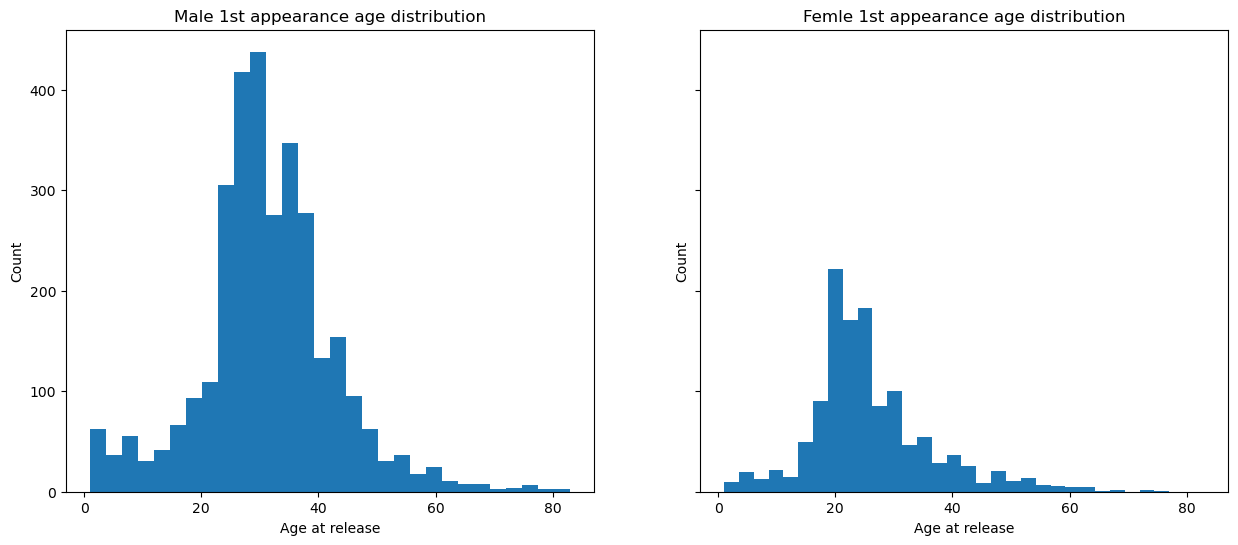

In [637]:

#Create two subplots for the histogram for the first age release
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True,sharex = True)

axs[0].hist(male_min['age_at_release'], bins=30)
axs[0].set_xlabel('Age at release')
axs[0].set_ylabel('Count')
axs[0].set_title('Male 1st appearance age distribution')

axs[1].hist(female_min['age_at_release'], bins=30)
axs[1].set_xlabel('Age at release')
axs[1].set_ylabel('Count')
axs[1].set_title('Femle 1st appearance age distribution')

* Male actors tend to have their first appearance at a wider age range, peaking between 25 and 35, while female actors peak earlier, between 20 and 30.
* Female actors show a steeper decline in first appearances after the age of 30, indicating a narrower age range for debut roles.
* The male age distribution has a longer tail into older ages, suggesting that males are more likely to start their acting careers later in life than females
* Not normally distributed

In [661]:
#Let us do some analysis on the overall recognition coefficient for the 1st movie release
#Concate both dataframes
concatenated_df = pd.concat([male_min, female_min], axis=0)

Text(0.5, 1.0, 'Age at release vs Recognition Coefficient')

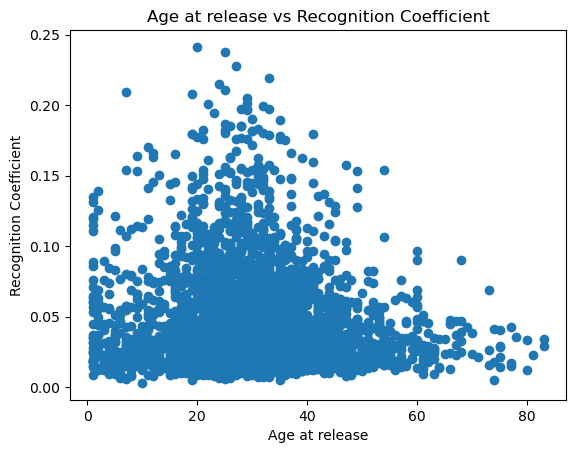

In [639]:
# Create a scatter plot to see the relationship between the age at release and the recognition coefficient
plt.scatter(concatenated_df['age_at_release'], concatenated_df['Recognition Coefficient'])
plt.xlabel('Age at release')
plt.ylabel('Recognition Coefficient')
plt.title('Age at release vs Recognition Coefficient')



The scatter plot suggests that actors around the ages of 20 to 40 tend to be more recognizable, but age isn't the only factor since recognition varies a lot for actors of all ages.

In [640]:
# Compute pearson correlation coefficient
corr, _ = stats.pearsonr(concatenated_df['age_at_release'], concatenated_df['Recognition Coefficient'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.075


The Pearson correlation coefficient of -0.075 indicates that there is a negligible negative relationship between an actor's age at release and their recognition coefficient, meaning age is not a strong indicator of recognition.

In [659]:
# Simple regression : regression of the recognition coefficient on the age at release and gender



#Renaming the columns for the regression
concatenated_df.rename(columns = {'Recognition Coefficient' : 'recognition_coefficient', 'Actor gender' : 'actor_gender'}, inplace = True)

# Correcting the formula with backticks for the column name with space
mod = smf.ols(formula='recognition_coefficient ~ C(actor_gender ) +age_at_release ', data=concatenated_df)

# Fit the model
results = mod.fit()

# View the results
print(results.summary())



                               OLS Regression Results                              
Dep. Variable:     recognition_coefficient   R-squared:                       0.022
Model:                                 OLS   Adj. R-squared:                  0.021
Method:                      Least Squares   F-statistic:                     48.65
Date:                     Thu, 16 Nov 2023   Prob (F-statistic):           1.26e-21
Time:                             01:21:43   Log-Likelihood:                 8863.3
No. Observations:                     4414   AIC:                        -1.772e+04
Df Residuals:                         4411   BIC:                        -1.770e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

* Notes about the regression :
* Very simple model 
* Higher R-squared than the 1st model implemented 
* All coeffecient are statistically significant
* The output indicates that age at release has a small but statistically significant negative effect on the recognition coefficient, and being a male actor is associated with a slight increase in the recognition coefficient, both with high levels of statistical significance.

In [660]:
# What if we add an interaction term and fit the model again

# The addition of the interaction term between 'actor_gender' and 'age_at_release' in the regression model 

mod = smf.ols(formula='recognition_coefficient ~ C(actor_gender)*age_at_release', data=concatenated_df)

# Fit the model
results = mod.fit()

# View the results
print(results.summary())




                               OLS Regression Results                              
Dep. Variable:     recognition_coefficient   R-squared:                       0.022
Model:                                 OLS   Adj. R-squared:                  0.021
Method:                      Least Squares   F-statistic:                     33.01
Date:                     Thu, 16 Nov 2023   Prob (F-statistic):           4.28e-21
Time:                             01:26:08   Log-Likelihood:                 8864.2
No. Observations:                     4414   AIC:                        -1.772e+04
Df Residuals:                         4410   BIC:                        -1.769e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

* Adding the interaction term between gender and age did not really improve our model, as shown by the unchanged R-squared value. The interaction term was not a significant predictor, suggesting that age affects recognition similarly for both genders. Therefore, the simpler model without the interaction term may be better to use.

***


Ajouter la partie de Nicolas! et merci Diego :)